| |<font size="5">(Correlation )  تحديد الأرتباطات ومعالجتها  </font>|
|-:|-:|
|<img src="https://assets-global.website-files.com/5baafc2653bd67278f206724/5be2a568752a5f818c0b5640_safegraph-icon%403x.png" width=200></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4">تحديد ترتباطات البيانات الرقمية </font>| 
||<font size="4">تخفيف الخصائص  </font>| 


## : تعميم النماذج بناء على بيانات رقمية

In [ ]:
pwd

'/content'

In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice2.csv", index_col=0)

In [2]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Scaled_OverallQal,Scaled_SalePrice
740,741,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,WD,Abnorml,132000,1696,112,2.0,0.500000,-0.866025,-0.798461,-0.615654
353,354,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,105900,1344,0,1.0,0.500000,-0.866025,-0.070084,-0.944772
1228,1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,New,Partial,367294,3404,296,2.5,-0.866025,0.500000,2.115045,2.351375


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [3]:
# تحديد نسب البينات الغائبة ضمن  المتغيرات الرقمية 
(df.select_dtypes("number").isna().sum()/df.shape[0]).sort_values(ascending=False)

LotFrontage          0.177320
GarageYrBlt          0.055670
MasVnrArea           0.005498
Id                   0.000000
MSSubClass           0.000000
OverallQual          0.000000
OverallCond          0.000000
YearBuilt            0.000000
YearRemodAdd         0.000000
LotArea              0.000000
BsmtFinSF2           0.000000
BsmtUnfSF            0.000000
1stFlrSF             0.000000
2ndFlrSF             0.000000
LowQualFinSF         0.000000
BedroomAbvGr         0.000000
KitchenAbvGr         0.000000
BsmtFinSF1           0.000000
TotRmsAbvGrd         0.000000
Fireplaces           0.000000
GarageCars           0.000000
GarageArea           0.000000
WoodDeckSF           0.000000
PoolArea             0.000000
MiscVal              0.000000
YrSold               0.000000
SalePrice            0.000000
TotalSF              0.000000
TotalPorchSF         0.000000
TotalBath            0.000000
SnMoSold             0.000000
CsMoSold             0.000000
Scaled_OverallQal    0.000000
Scaled_Sal

In [4]:
# Scaled_SalePrice, Sacled_OverallQal  التخلص من المتغييرن الذين تم استحداثهما  أثتاء تغيير سام البيانات أعلاه 
df.drop([ "Id", "Scaled_OverallQal" , "Scaled_SalePrice"], axis=1, inplace=True )

In [5]:
pd.options.display.max_columns=99
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,0,NaN,NaN,NaN,0,2008,WD,Normal,208500,2566,61,3.5,0.866025,5.000000e-01
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,NaN,NaN,NaN,0,2007,WD,Normal,181500,2524,0,2.5,0.500000,-8.660254e-01
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,0,NaN,NaN,NaN,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000,-1.836970e-16


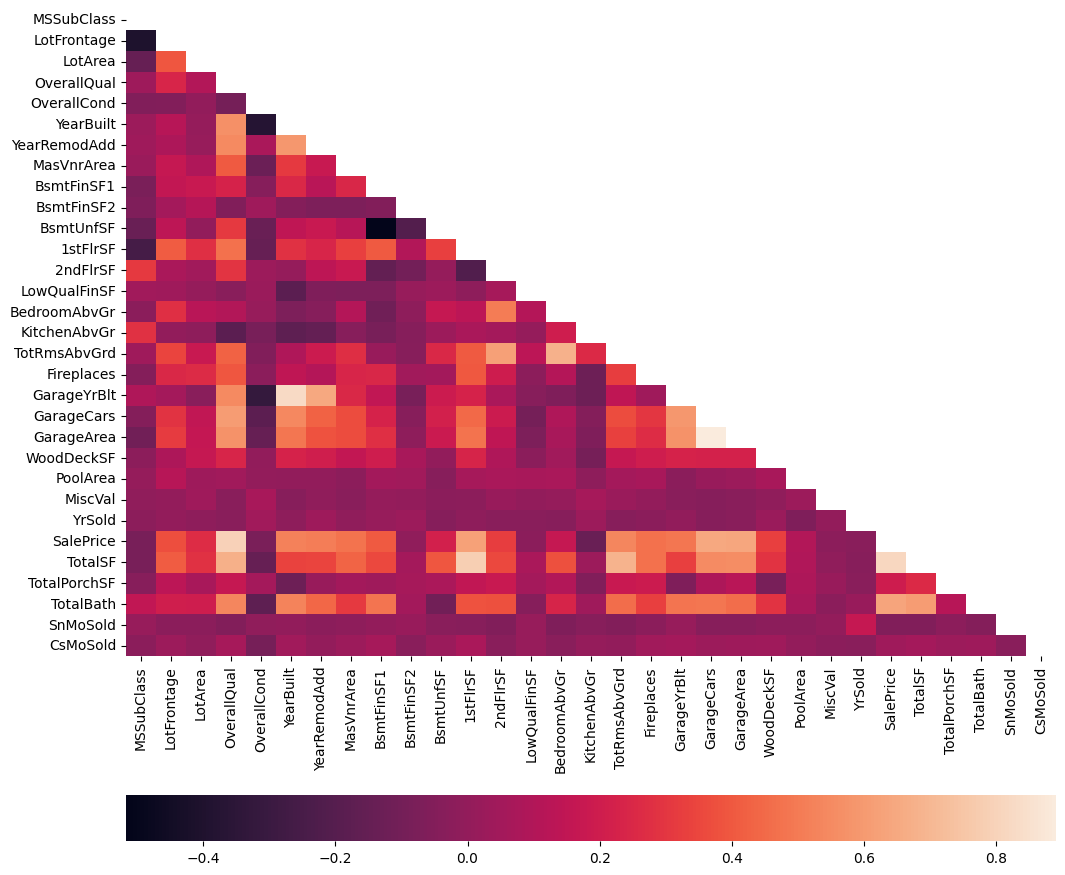

In [6]:
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
plt.figure(figsize=(12,12))
matrix = np.triu(df.select_dtypes("number").corr())
_=sns.heatmap(df.select_dtypes("number").corr(),  mask=matrix, cbar_kws= {'orientation': 'horizontal'}, annot=False)


In [7]:
df.select_dtypes("number").corr().T

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,PoolArea,MiscVal,YrSold,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
MSSubClass,1.000000,-0.402701,-0.146399,0.037768,-0.057800,0.029613,0.042461,0.025370,-0.077381,-0.065759,-0.137441,-0.262126,0.309964,0.046734,-0.024920,0.283015,0.040490,-0.047194,0.087685,-0.044323,-0.104930,-0.019034,0.008153,-0.007173,-0.019501,-0.082984,-0.082983,-0.035868,0.152881,0.014386,-0.024580
LotFrontage,-0.402701,1.000000,0.392049,0.240460,-0.053751,0.118318,0.084151,0.165891,0.154086,0.056007,0.138171,0.411163,0.075575,0.042046,0.278265,-0.003439,0.340897,0.247431,0.059108,0.290900,0.316396,0.084663,0.116614,-0.000036,0.005097,0.369805,0.408458,0.134249,0.207040,-0.027615,0.029831
LotArea,-0.146399,0.392049,1.000000,0.099892,-0.000641,0.010505,0.010914,0.090687,0.180780,0.114312,-0.000975,0.275884,0.048537,0.005584,0.121212,-0.016682,0.180018,0.261578,-0.030512,0.150265,0.160709,0.166865,0.036480,0.038491,-0.014268,0.268806,0.281251,0.066762,0.198069,-0.022322,-0.007012
OverallQual,0.037768,0.240460,0.099892,1.000000,-0.094055,0.570420,0.548197,0.402972,0.226728,-0.058991,0.310068,0.471740,0.296071,-0.030424,0.102771,-0.185023,0.424794,0.392534,0.548791,0.609812,0.573404,0.240960,0.044797,-0.029746,-0.029417,0.792879,0.673583,0.168055,0.537348,-0.053801,0.064145
OverallCond,-0.057800,-0.053751,-0.000641,-0.094055,1.000000,-0.377583,0.073146,-0.126823,-0.043217,0.039430,-0.137002,-0.143864,0.027409,0.025174,0.011874,-0.087790,-0.056306,-0.022572,-0.323538,-0.181333,-0.143894,-0.001057,0.002178,0.069752,0.043995,-0.078465,-0.144170,0.055839,-0.175280,-0.010145,-0.092253
YearBuilt,0.029613,0.118318,0.010505,0.570420,-0.377583,1.000000,0.591144,0.311971,0.251201,-0.048801,0.147993,0.280186,0.009660,-0.183991,-0.071099,-0.174867,0.092161,0.144064,0.826356,0.541222,0.487405,0.225366,-0.005190,-0.033411,-0.014655,0.521888,0.338794,-0.126642,0.522640,-0.002344,0.045212
YearRemodAdd,0.042461,0.084151,0.010914,0.548197,0.073146,0.591144,1.000000,0.174451,0.124300,-0.067683,0.180588,0.237817,0.139576,-0.062467,-0.041329,-0.149786,0.189179,0.108734,0.642836,0.424197,0.379124,0.206260,-0.003475,-0.008930,0.034873,0.505876,0.342604,0.019812,0.441423,-0.022674,-0.000239
MasVnrArea,0.025370,0.165891,0.090687,0.402972,-0.126823,0.311971,0.174451,1.000000,0.242242,-0.071404,0.115494,0.326111,0.175720,-0.069121,0.105961,-0.036775,0.274285,0.240643,0.248674,0.363886,0.363412,0.157256,-0.020549,-0.029188,-0.009582,0.476749,0.431585,0.049239,0.312982,-0.015168,0.030780
BsmtFinSF1,-0.077381,0.154086,0.180780,0.226728,-0.043217,0.251201,0.124300,0.242242,1.000000,-0.049895,-0.516955,0.402772,-0.154542,-0.066689,-0.113204,-0.083160,0.018466,0.242371,0.151050,0.230333,0.278092,0.202236,0.052807,0.005410,0.015126,0.405131,0.353839,0.039186,0.482379,0.004469,0.061852
BsmtFinSF2,-0.065759,0.056007,0.114312,-0.058991,0.039430,-0.048801,-0.067683,-0.071404,-0.049895,1.000000,-0.209767,0.103435,-0.099783,0.014690,-0.016067,-0.040970,-0.034475,0.048091,-0.087306,-0.036850,-0.014679,0.068734,0.046317,0.005079,0.031861,-0.011058,0.055088,0.062067,0.052426,0.016598,-0.030065


In [8]:
df.select_dtypes("number").keys()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice', 'TotalSF', 'TotalPorchSF', 'TotalBath',
       'SnMoSold', 'CsMoSold'],
      dtype='object')

In [9]:
#  قائمة المتغيرات الأكثر ارتباطا بعضها ببعض  

corr = df.select_dtypes("number").corr()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
corr_cols[corr_cols > 0.7]  # الاكتفاء بالمتغيرات التي يفوق ارتياطها 80% باحدى باقي المتغيرات

GarageArea     0.890163
GarageCars     0.890163
YearBuilt      0.826356
GarageYrBlt    0.826356
TotalSF        0.815996
SalePrice      0.815996
OverallQual    0.792879
1stFlrSF       0.782480
dtype: float64

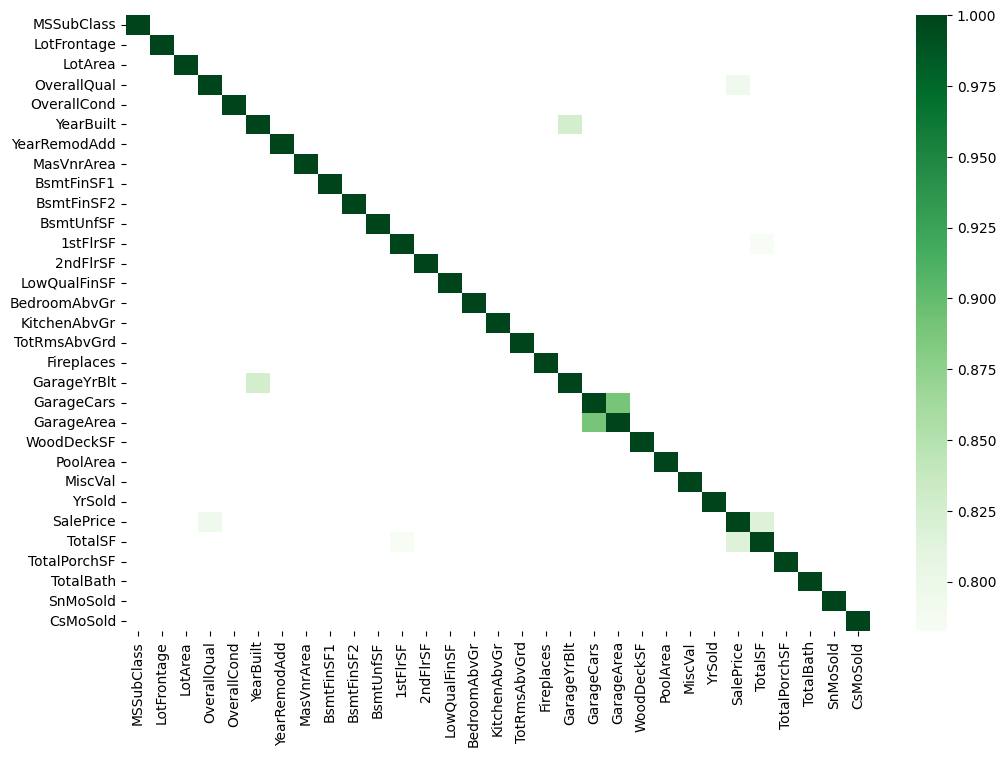

In [10]:

plt.figure(figsize=(12,8))
corr = df.select_dtypes("number").corr() 
_=sns.heatmap(corr[corr>=.7], cmap="Greens")
# _تناسب تواريخ بناء البيت والمرآب_

In [11]:
df[['1stFlrSF', "2ndFlrSF"]].corr()

,1stFlrSF,2ndFlrSF
1stFlrSF,1.000000,-0.216036
2ndFlrSF,-0.216036,1.000000


In [12]:
df[['GarageCars','GarageArea', 'YearBuilt',  'GarageYrBlt']].corr()

,GarageCars,GarageArea,YearBuilt,GarageYrBlt
GarageCars,1.000000,0.890163,0.541222,0.590702
GarageArea,0.890163,1.000000,0.487405,0.573513
YearBuilt,0.541222,0.487405,1.000000,0.826356
GarageYrBlt,0.590702,0.573513,0.826356,1.000000


In [14]:
df.drop(['GarageCars', 'GarageYrBlt'], axis=1, inplace=True)
# check correlation between  'TotRmsAbvGrd'  and YearBuilt

In [15]:
df.shape

(1455, 72)

In [16]:
df.to_csv("../data/HousePrice3.csv")